# XANES and XES BT1

In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from daxs.measurements import Hdf5Source, Xas, Xes
from scipy.integrate import simpson

## Load multiple files

PEO = ['4a','4b','4c','4d','4e','4f']#,'6e'] 
SEO79S = ['3a','3b','3c','3d','3e','3f']#,'6h'] 
EG_TFSI = ['2a','2b','2c','2d','2e','2f']#,'6g'] 
PSTFSI = ['1a','1b','1c','1d','1e','1f']#,'6c']
S = ['6a', '6b','6c','6d','6e', '6g', '6h'] #S, Li2S, PSTFSI, SEO67S, PEO, EG_TFSI, SEO79S

S_x = [3,4,5,6,7,8]
SEO_con = [0.074,0.037,0.018,0.062,0.031,0.015]
PEO_con = [0.063,0.031,0.016,0.062,0.047,0.016]
EG_TFSI_con = [0.062,0.031,0.016,0.063,0.032,0.015]
PSTFSI_con = [0.061,0.029,0.013,0.039,0.032,0.015]
#3-102 for XAS, #1-12 for XES

counter_XAS = {'x':'hdh_energy', 'signal':"gdall", "monitor":"I0t"}
counter_XES = {'x':'xes_en_texs', 'signal':"gdall", "monitor":"I0t"}

PEO_XAS = []
SEO79S_XAS = []
EG_TFSI_XAS = []
PSTFSI_XAS = []
S_XAS = []

PEO_XES = []
SEO79S_XES = []
EG_TFSI_XES = []
PSTFSI_XES = []
S_XES = []


In [2]:
counter_XAS = {'x':'.1/measurement/hdh_energy', 'signal':".1/measurement/gdall", "monitor":".1/measurement/I0t"}
counter_XES = {'x':'.1/measurement/xes_en_texs', 'signal':".1/measurement/gdall", "monitor":".1/measurement/I0t"}

name_1 = ['1a','1b','1c','1d','1e','1f']
name_2 = ['2a','2b','2c','2d','2e','2f']
name_3 = ['3a','3b','3c','3d','3e','3f']
name_4 = ['4a','4b','4c','4d','4e','4f']

S_x = [3,4,5,6,7,8]
SEO73S_con = [0.074,0.037,0.018,0.062,0.031,0.015]
PEO_con = [0.063,0.031,0.016,0.062,0.047,0.016]
EG_TFSI_con = [0.062,0.031,0.016,0.063,0.032,0.015]
PSTFSI_con = [0.061,0.029,0.013,0.039,0.032,0.015]
#3-102 for XAS, #1-12 for XES

every = [name_1, name_2, name_3, name_4] #contains the sample ID of each series 
#########################################
#For XAS
name_1_XAS = []
name_2_XAS = []
name_3_XAS = []
name_4_XAS = []

every_XAS = [name_1_XAS, name_2_XAS, name_3_XAS, name_4_XAS] 
XAS_DF = []
#########################################
#For XES

name_1_XES = []
name_2_XES = []
name_3_XES = []
name_4_XES = []

every_XES = [name_1_XES, name_2_XES, name_3_XES, name_4_XES]
XES_DF = []

every_con = [PSTFSI_con, EG_TFSI_con, SEO73_con, PEO_con]

NameError: name 'SEO73_con' is not defined

## XAS

In [45]:
for j in range(4):
    x = every[j] 
    x_XAS = every_XAS[j]

    for i in x:
        file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_' + i + r'\191_' + i + r'_xanes\191_' + i + r'_xanes.h5'
        file = file.replace('\\', '/')
        source = Hdf5Source(file, ['3-102'], data_mappings=counter_XAS)        
        measurment_XAS = Xas(source)
        measurment_XAS.find_outliers()#threshold=9)
        measurment_XAS.remove_outliers()
        measurment_XAS.normalize(mode = 'area')
        np.savetxt(i+'_XAS_trimmed.txt',np.c_[measurment_XAS.x[10:-10], measurment_XAS.signal[10:-10]] )
        XAS_DF.append(measurment_XAS.signal)
XAS = pd.DataFrame(XAS_DF).T
XAS.columns = name_1 + name_2 + name_3 + name_4


In [46]:
 x_XAS=measurment_XAS.x*1000

In [90]:
path = 'C:/Users/oppcexpv/Yuan-Chi code/XAS_BT1.csv'
XAS = pd.read_csv(path, delimiter=',' , skiprows=28, engine='python', header=None)
x_XAS = XAS[XAS.columns[0]]
XAS = XAS.drop(XAS.columns[0], axis=1)
XAS.columns = name_1 + name_2 + name_3 + name_4

In [139]:
XAS

,1a,1b,1c,1d,1e,1f,2a,2b,2c,2d,...,3c,3d,3e,3f,4a,4b,4c,4d,4e,4f
0,0.009747,0.009722,0.005352,0.006317,0.006048,0.005034,0.014405,0.007481,0.004623,0.006543,...,0.005088,0.010491,0.007435,0.001952,0.013400,0.009982,0.006092,0.012911,0.013729,0.003269
1,0.009363,0.009883,0.005801,0.006189,0.005866,0.005028,0.014521,0.007649,0.004620,0.006479,...,0.004872,0.009739,0.007378,0.002087,0.014411,0.010074,0.006105,0.012685,0.013440,0.003291
2,0.009547,0.009354,0.005583,0.006006,0.005880,0.004812,0.014494,0.007778,0.004564,0.006450,...,0.005072,0.010115,0.007386,0.002182,0.014186,0.009994,0.006191,0.012995,0.013490,0.003327
3,0.009386,0.009474,0.005581,0.006165,0.005920,0.004874,0.014065,0.007822,0.004444,0.006712,...,0.005055,0.009744,0.007098,0.001906,0.013368,0.009700,0.006169,0.012843,0.013247,0.003176
4,0.009511,0.010060,0.005591,0.006403,0.006030,0.005127,0.014665,0.007755,0.004628,0.006753,...,0.004938,0.010240,0.007489,0.001976,0.013801,0.009642,0.006175,0.013020,0.013475,0.003214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.236494,0.234321,0.188379,0.226327,0.196595,0.193463,0.347121,0.220607,0.182618,0.222342,...,0.159078,0.276099,0.236555,0.092756,0.404616,0.291779,0.222719,0.326230,0.341728,0.142960
425,0.233795,0.231645,0.185453,0.223964,0.195227,0.195170,0.349968,0.220325,0.181453,0.220986,...,0.160048,0.274334,0.235027,0.092195,0.403414,0.291949,0.223652,0.325586,0.342660,0.141002
426,0.233963,0.232474,0.186369,0.223465,0.196576,0.191911,0.344549,0.220949,0.182899,0.221275,...,0.158985,0.275832,0.234068,0.091710,0.405391,0.293733,0.223746,0.326468,0.341245,0.141829
427,0.236944,0.231271,0.185670,0.225351,0.197208,0.191816,0.347322,0.219138,0.182825,0.221241,...,0.159683,0.275998,0.234182,0.092889,0.405014,0.293946,0.221517,0.326169,0.340312,0.142624


<IPython.core.display.Javascript object>


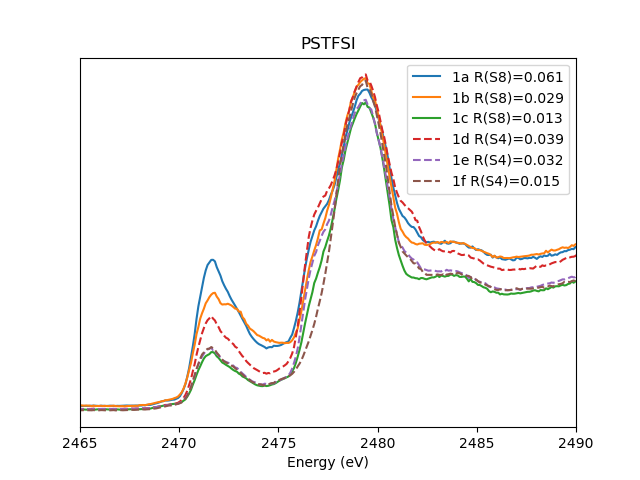

<IPython.core.display.Javascript object>


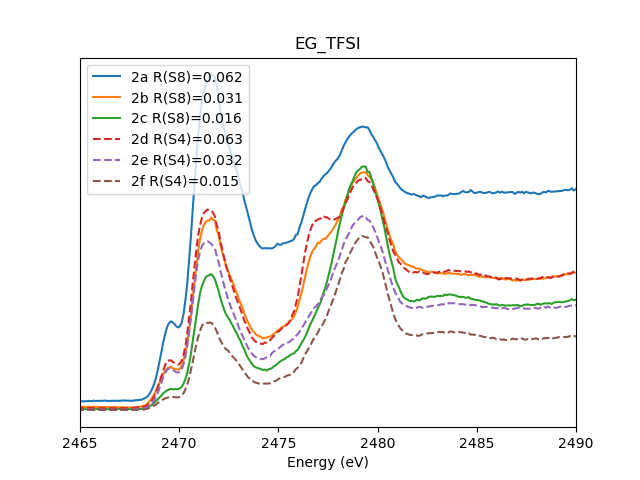

<IPython.core.display.Javascript object>


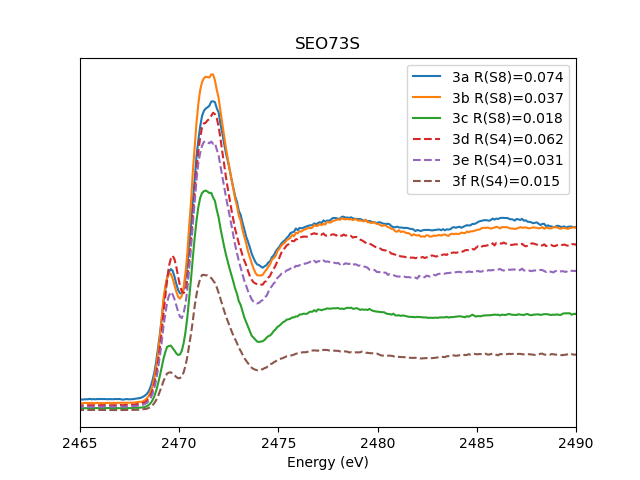

<IPython.core.display.Javascript object>


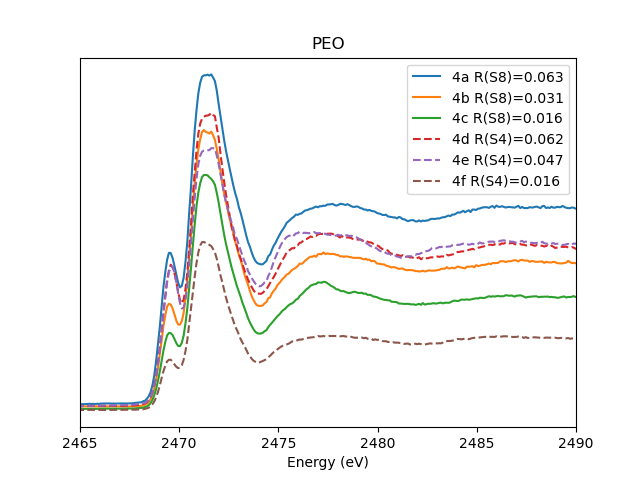

In [147]:
name = ['PSTFSI', 'EG_TFSI', 'SEO73S', 'PEO']
XAS_line = [2469.31,2471.17,2471.71,2472.8,2476.96,2478.57,2479.38,2483.81]

k=0
for i in every: #i = PEO...
    fig=plt.figure()
    con = 0
    for j in i[:3]: #j = '4a', '4b'...
        plt.plot(x_XAS, XAS[j], label=j+' R(S8)='+str(every_con[k][con]))
        con+=1
    
    con = 3
    for j in i[3:]:
        plt.plot(x_XAS, XAS[j],'--', label=j+' R(S4)='+str(every_con[k][con]))
        con+=1

    ymin = XAS[i].min().min()
    ymax = XAS[i].max().max()
    
    #for l in XAS_line:
    #    plt.plot([l,l],[ymin*0.9,ymax*1.2], '--', color='gray', linewidth=1)

    plt.xlim(2465,2490)
    #plt.ylim(ymin*0.9,ymax*1.05)
    plt.yticks([])
    plt.legend()
    plt.xlabel('Energy (eV)')
    plt.title(name[k])
    #plt.savefig('%s_XAS_BT1.png' %name[k], bbox_inches='tight')
    k+=1

## Intensity vs Concentration

In [47]:
name_3 = ['3a','3b','3c','3d','3e','3f']
name_4 = ['4a','4b','4c','4d','4e','4f']

SEO73_con = [0.074,0.037,0.018,0.062,0.031,0.015]
PEO_con = [0.063,0.031,0.016,0.062,0.047,0.016]

peak_max_1 = []
peak_max_2 = []
peak_max_3 = []
peak_max_4 = []

for i in name_1:
    peak_max_1.append(XAS[i][100:180].max())
for i in name_2:
    peak_max_2.append(XAS[i][100:180].max())
for i in name_3:
    peak_max_3.append(XAS[i].max())
for i in name_4:
    peak_max_4.append(XAS[i].max())

<IPython.core.display.Javascript object>


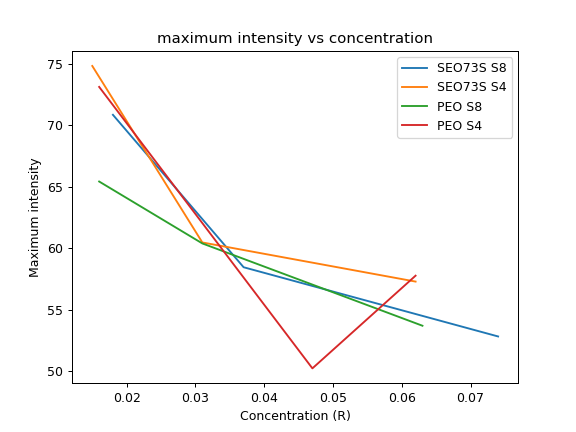

Text(0.5, 1.0, 'maximum intensity vs concentration')

In [49]:
fig=plt.figure()
plt.plot(SEO73_con[:3],peak_max_3[:3], label='SEO73S S8')
plt.plot(SEO73_con[3:],peak_max_3[3:], label='SEO73S S4')
plt.plot(PEO_con[:3],peak_max_4[:3], label='PEO S8')
plt.plot(PEO_con[3:],peak_max_4[3:], label='PEO S4')
plt.legend()
#plt.xscale('log')
plt.ylabel('Maximum intensity')
plt.xlabel('Concentration (R)')
plt.title('maximum intensity vs concentration')
#plt.savefig('maximum intensity vs concentration', bbox_inches='tight')

<IPython.core.display.Javascript object>


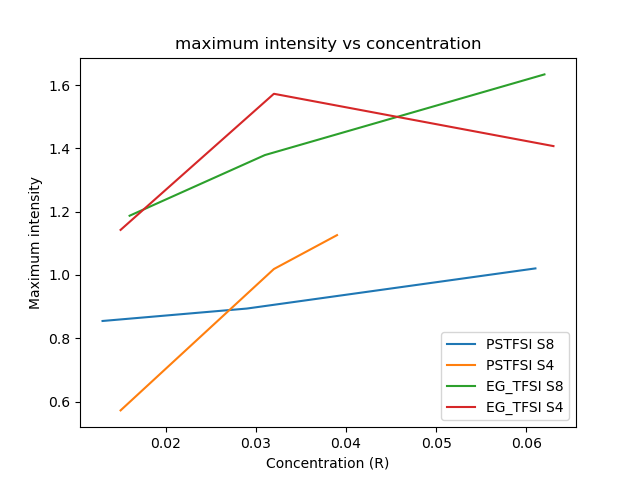

Text(0.5, 1.0, 'maximum intensity vs concentration')

In [9]:
fig=plt.figure()
plt.plot(PSTFSI_con[:3],peak_max_1[:3], label='PSTFSI S8')
plt.plot(PSTFSI_con[3:],peak_max_1[3:], label='PSTFSI S4')
plt.plot(EG_TFSI_con[:3],peak_max_2[:3], label='EG_TFSI S8')
plt.plot(EG_TFSI_con[3:],peak_max_2[3:], label='EG_TFSI S4')

plt.legend()
plt.ylabel('Maximum intensity')
plt.xlabel('Concentration (R)')
plt.title('maximum intensity vs concentration')
#plt.savefig('maximum intensity vs concentration', bbox_inches='tight')

## XES

In [31]:
for j in range(len(every)):
    x = every[j] 
    

    for i in x:
        file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_' + i + r'\191_' + i + r'_xes\191_' + i + r'_xes.h5'
        file = file.replace('\\', '/')
        source = Hdf5Source(file, ['3-12'], data_mappings=counter_XES)
        measurment_XES = Xes(source)#,counters=counter_XES)
        measurment_XES.find_outliers()#threshold=9)
        measurment_XES.remove_outliers()
        measurment_XES.normalize(mode = 'area')
        #np.save(i+'_XES.txt',np.c_[measurment_XES.x*1000, measurment_XES.signal] )
        pd.DataFrame([measurment_XES.x*1000, measurment_XES.signal]).T.to_csv(i+'_XES.csv', header=False, index=False)
        XES_DF.append(measurment_XES.signal)
x_XES = measurment_XES.x
XES = pd.DataFrame(XES_DF).T
XES.columns = name_1 + name_2 + name_3 + name_4

In [4]:
XES

,1a,1b,1c,1d,1e,1f,2a,2b,2c,2d,...,3c,3d,3e,3f,4a,4b,4c,4d,4e,4f
0,0.003823,0.003941,0.002629,0.003207,0.002862,0.002427,0.007846,0.003981,0.003165,0.004012,...,0.003475,0.006086,0.005096,0.001872,0.006843,0.004934,0.003238,0.004388,0.005718,0.002382
1,0.003684,0.004127,0.002749,0.003330,0.003154,0.002437,0.008395,0.004007,0.003171,0.003952,...,0.003733,0.006596,0.004827,0.002037,0.007102,0.004608,0.003499,0.004693,0.005910,0.002346
2,0.003646,0.004269,0.002709,0.003319,0.003287,0.002552,0.008269,0.004082,0.003347,0.004156,...,0.003453,0.006561,0.005217,0.002109,0.007281,0.004958,0.003529,0.004862,0.006198,0.002506
3,0.003900,0.004228,0.002842,0.003361,0.003226,0.002649,0.008715,0.004096,0.003393,0.004192,...,0.003648,0.007035,0.005111,0.002093,0.007905,0.005062,0.003729,0.005201,0.006248,0.002454
4,0.004081,0.004265,0.002865,0.003659,0.003272,0.002656,0.009079,0.004654,0.003313,0.004337,...,0.003886,0.007146,0.005301,0.002192,0.007992,0.005301,0.003758,0.005278,0.006569,0.002597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.011838,0.011510,0.010729,0.011195,0.011746,0.011021,0.015513,0.009912,0.009107,0.010939,...,0.006206,0.010886,0.008682,0.003641,0.014039,0.010752,0.007892,0.010658,0.013356,0.004821
97,0.010977,0.010967,0.010117,0.010076,0.010613,0.010276,0.014777,0.009030,0.008832,0.010317,...,0.006036,0.010757,0.008556,0.003432,0.013484,0.010053,0.007140,0.010576,0.012360,0.004676
98,0.010277,0.010481,0.009574,0.009633,0.009847,0.009435,0.013844,0.008913,0.008308,0.009880,...,0.005471,0.009880,0.008178,0.003269,0.012964,0.009581,0.007324,0.009883,0.012068,0.004435
99,0.010122,0.009817,0.008992,0.009465,0.009588,0.008887,0.013074,0.008455,0.007719,0.009123,...,0.005401,0.009449,0.007869,0.003236,0.012596,0.009015,0.006951,0.009442,0.011370,0.004188


<IPython.core.display.Javascript object>


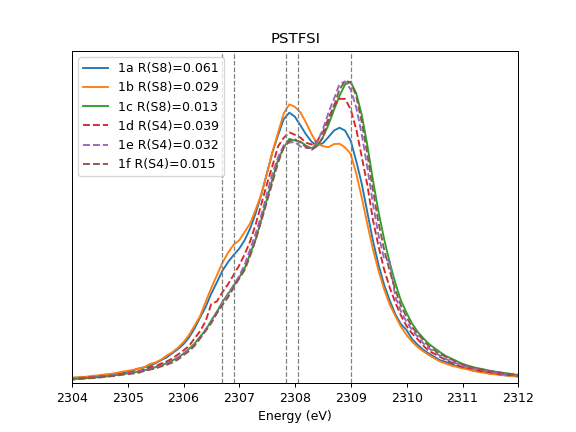

<IPython.core.display.Javascript object>


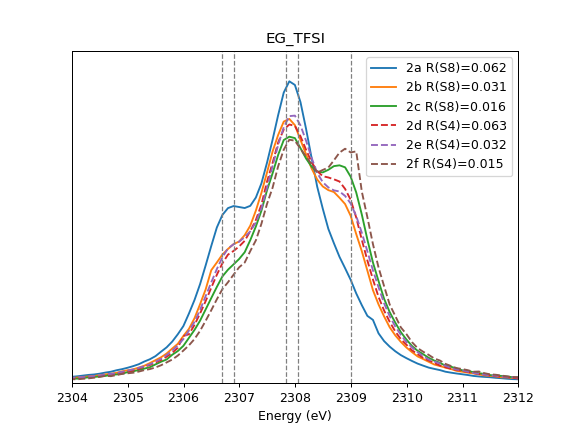

<IPython.core.display.Javascript object>


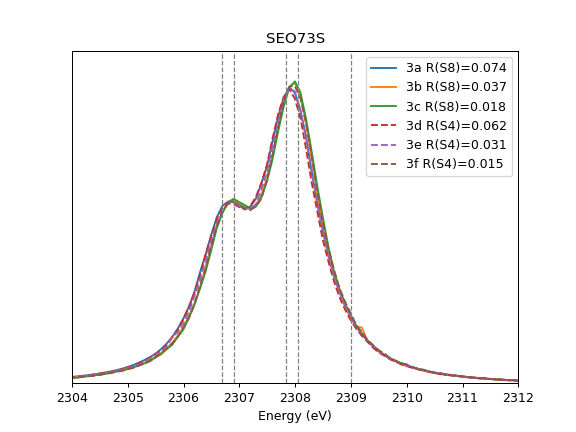

<IPython.core.display.Javascript object>


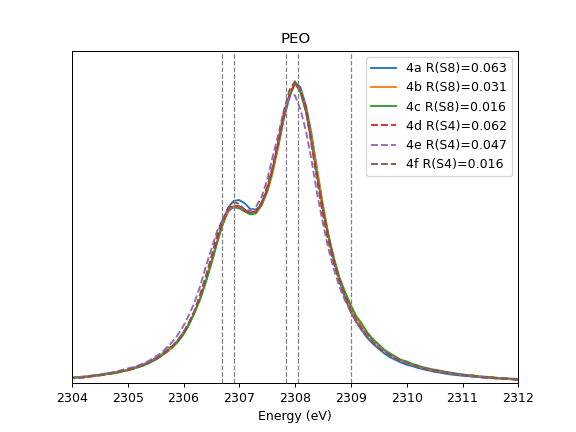

In [60]:
XES_line = [2306.68,2306.9,2307.83, 2308.05, 2309]
name = ['PSTFSI', 'EG_TFSI', 'SEO73S', 'PEO']
k=0
for i in every: #i = PEO...
    fig=plt.figure()
    con=0
    for j in i[:3]: #j = '4a', '4b'...
        plt.plot(measurment_XES.x*1000, XES[j], label=j+' R(S8)='+str(every_con[k][con]))
        con+=1
    con=3
    for j in i[3:]:
        plt.plot(measurment_XES.x*1000, XES[j],'--', label=j+' R(S4)='+str(every_con[k][con]))
        con+=1

    ymin = XES[i].min().min()
    ymax = XES[i].max().max()
    
    for l in XES_line:
        plt.plot([l,l],[ymin*0.9,ymax*1.2], '--', color='gray', linewidth=1)

    plt.xlim(2304,2312)
    plt.ylim(ymin*0.8,ymax*1.1)
    plt.legend()
    plt.xlabel('Energy (eV)')
    plt.yticks([])
    plt.title(name[k])
    #plt.savefig('%s_XES_BT1.png' %name[k], bbox_inches='tight')
    k+=1

In [10]:
XES_area=[]

for i in XES.columns[12:]:
    XES_area.append(simpson(XES[i], measurment_XES.x*1000))

In [23]:
XES_area

[1.3728277748282014,
 1.0322731912424907,
 0.5695251739655117,
 1.0245068642120585,
 0.8169959989934171,
 0.32658784523046797,
 1.181449713121564,
 0.8282749559910907,
 0.6001886654678479,
 0.8577082777922198,
 1.0723996054976113,
 0.3982134770678684]

<IPython.core.display.Javascript object>


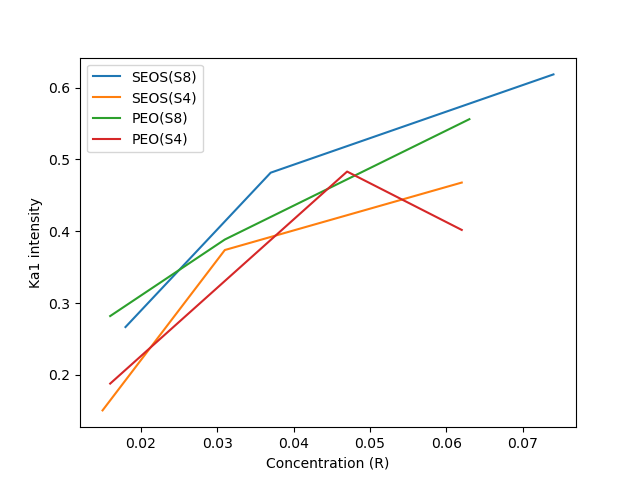

Text(0, 0.5, 'Ka1 intensity')

In [19]:
plt.figure()
plt.plot(SEO73_con[:3], XES.max()[12:15], label='SEOS(S8)')
plt.plot(SEO73_con[3:], XES.max()[15:18], label='SEOS(S4)')
plt.plot(PEO_con[:3], XES.max()[18:21], label='PEO(S8)')
plt.plot(PEO_con[3:], XES.max()[21:24], label='PEO(S4)')
plt.legend()
plt.xlabel('Concentration (R)')
plt.ylabel('Ka1 intensity')

<IPython.core.display.Javascript object>


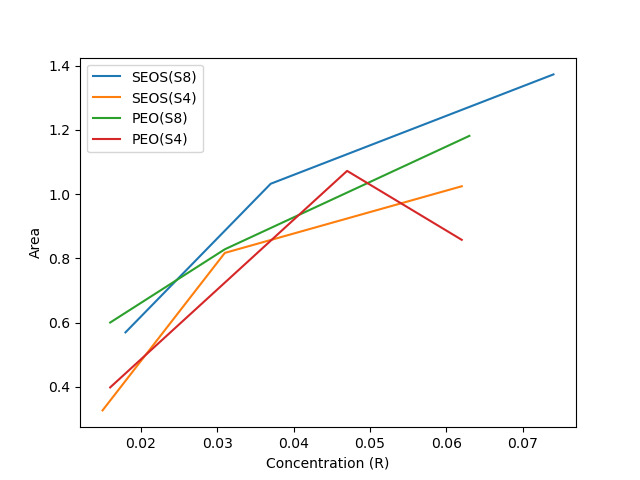

Text(0, 0.5, 'Area')

In [14]:
plt.figure()
plt.plot(SEO73_con[:3], XES_area[:3], label='SEOS(S8)')
plt.plot(SEO73_con[3:], XES_area[3:6], label='SEOS(S4)')
plt.plot(PEO_con[:3], XES_area[6:9], label='PEO(S8)')
plt.plot(PEO_con[3:], XES_area[9:], label='PEO(S4)')
plt.legend()
plt.xlabel('Concentration (R)')
plt.ylabel('Area')

# Peak area analysis

In [34]:
file = r'C:\Users\oppcexpv\Yuan-Chi code\XAS_peak area3.csv'
file = file.replace('\\', '/')

peak_area_BT1 = pd.read_csv(file, delimiter=',', index_col=0, header=0)
peak_area_BT1

,gauss4_height,gauss4_fwhm,gauss4_center,g4_area,gauss3_height,gauss3_fwhm,gauss3_sigma_stderr,g3_area,gauss2_height,gauss2_fwhm,gauss2_center,g2_area,gauss1_height,gauss1_fwhm,gauss1_center,g1_area
# Data Set,,,,,,,,,,,,,,,,
1a,0.548859,2.295982,2472.32817,1.341410,0.404345,1.069385,0.02123159,0.460276,0.159341,0.787980,2470.92480,0.133652,0.015980,0.706722,2469.28395,0.012021
1b,0.451724,2.039204,2472.40296,0.980541,0.072816,0.476702,0.01667618,0.036949,0.348269,1.183296,2471.18294,0.438672,0.020428,1.122306,2469.43973,0.024404
1c,0.267275,2.450220,2472.23351,0.697100,0.146453,0.859451,0.02393824,0.133984,0.110047,0.764437,2471.00788,0.089547,0.020619,1.189671,2469.41672,0.026112
1d,0.263389,2.070721,2472.59778,0.580565,0.027854,0.718739,0.06168872,0.021310,0.394083,1.337462,2471.40383,0.561050,0.016999,0.947448,2469.43749,0.017143
1e,0.244366,1.952799,2472.32341,0.507961,0.095474,0.711701,0.02116503,0.072330,0.222416,0.989886,2471.12976,0.234359,0.016047,1.432486,2469.65639,0.024470
1f,0.240417,1.993643,2472.43031,0.510206,3.700646,0.011360,nan,0.044749,0.300588,1.271632,2471.30351,0.406879,0.023553,1.014279,2469.52019,0.025429
2a,1.169558,2.635306,2472.24843,3.280840,0.258432,0.679771,0.0072,0.187000,0.724124,1.066128,2471.09470,0.821778,0.318451,0.997062,2469.49068,0.337985
2b,0.946628,2.505093,2472.04578,2.524268,0.223726,0.641047,0.008528,0.152665,0.576559,0.978425,2471.10435,0.600487,0.229538,1.066250,2469.40451,0.260523
2c,0.732242,2.133652,2472.21083,1.663070,0.196375,0.626174,0.00883614,0.130892,0.674276,1.045578,2471.15475,0.750458,0.156182,1.233642,2469.53505,0.205093


In [67]:
peak_area_BT1['mp_ratio']=1

for i in range(len(peak_area_BT1)):
    peak_area_BT1['mp_ratio'].iloc[i] = (peak_area_BT1['g4_area'].iloc[i]+
                                         peak_area_BT1['g3_area'].iloc[i]+
                                         peak_area_BT1['g2_area'].iloc[i])/peak_area_BT1['g1_area'].iloc[i]

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_23360\1359377850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_area_BT1['mp_ratio'].iloc[i] = (peak_area_BT1['g4_area'].iloc[i]+


In [8]:
name_3 = ['3a','3b','3c','3d','3e','3f']
SEO73S_con = [0.074,0.037,0.018,0.062,0.031,0.015]

name_4 = ['4a','4b','4c','4d','4e','4f']
PEO_con = [0.063,0.031,0.016,0.062,0.047,0.016]

name_2 = ['2a','2b','2c','2d','2e','2f']
EG_TFSI_con = [0.062,0.031,0.016,0.063,0.032,0.015]

name_1 = ['1a','1b','1c','1d','1e','1f']
PSTFSI_con = [0.061,0.029,0.013,0.039,0.032,0.015]

In [141]:
dic1 = {}
for i in range(len(name_1)):
    dic1[name_1[i]] = PSTFSI_con[i]

dic2 = {}
for i in range(len(name_2)):
    dic2[name_2[i]] = EG_TFSI_con[i]

dic3 = {}
for i in range(len(name_3)):
    dic3[name_3[i]] = SEO73S_con[i]
    
dic4 = {}
for i in range(len(name_4)):
    dic4[name_4[i]] = PEO_con[i]

### PSTFSI

<IPython.core.display.Javascript object>


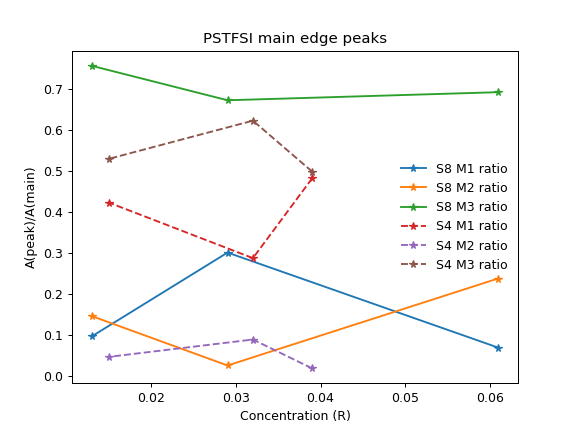

In [59]:
fifig, ax1 = plt.subplots()

a=peak_area_BT1['g2_area'][:3]
b=peak_area_BT1['g3_area'][:3]
c=peak_area_BT1['g4_area'][:3]

ax1.plot(PSTFSI_con[:3],a/(a+b+c),'-*', label='S8 M1 ratio')#, color='b')
ax1.plot(PSTFSI_con[:3],b/(a+b+c),'-*', label='S8 M2 ratio')#, color='r')
ax1.plot(PSTFSI_con[:3],c/(a+b+c),'-*', label='S8 M3 ratio')

d=peak_area_BT1['g2_area'][3:6]
e=peak_area_BT1['g3_area'][3:6]
f=peak_area_BT1['g4_area'][3:6]

ax1.plot(PSTFSI_con[3:],d/(d+e+f),'--*', label='S4 M1 ratio')#, color='b')
ax1.plot(PSTFSI_con[3:],e/(d+e+f),'--*', label='S4 M2 ratio')#, color='r')
ax1.plot(PSTFSI_con[3:],f/(d+e+f),'--*', label='S4 M3 ratio')
ax1.legend(frameon=False)
#ax2.legend(frameon=False, loc='center right')

ax1.set_xlabel('Concentration (R)')
#ax1.set_ylabel('Peak area')
ax1.set_title('PSTFSI main edge peaks')
ax1.set_ylabel('A(peak)/A(main)')#, color='r')
#ax2.tick_params(axis="y", labelcolor='r')
plt.savefig('PSTFSI main edge peaks ratio', bbox_inches='tight')

### EG_TFSI

<IPython.core.display.Javascript object>


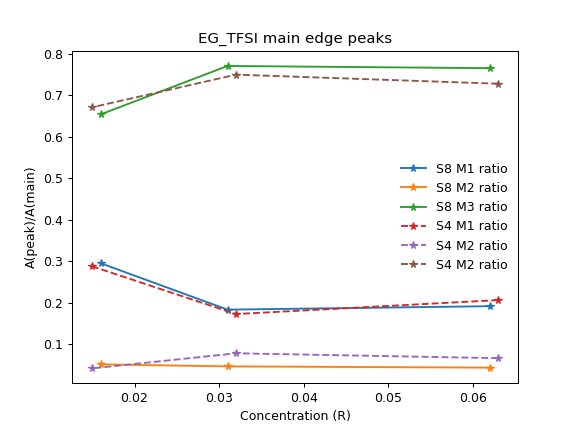

In [58]:
# M3 vs concentration
fig, ax1 = plt.subplots()

a=peak_area_BT1['g2_area'][6:9]
b=peak_area_BT1['g3_area'][6:9]
c=peak_area_BT1['g4_area'][6:9]

ax1.plot(EG_TFSI_con[:3],a/(a+b+c),'-*', label='S8 M1 ratio')#, color='b')
ax1.plot(EG_TFSI_con[:3],b/(a+b+c),'-*', label='S8 M2 ratio')#, color='r')
ax1.plot(EG_TFSI_con[:3],c/(a+b+c),'-*', label='S8 M3 ratio')#, color='r')

d=peak_area_BT1['g2_area'][9:12]
e=peak_area_BT1['g3_area'][9:12]
f=peak_area_BT1['g4_area'][9:12]

ax1.plot(EG_TFSI_con[3:],d/(d+e+f),'--*', label='S4 M1 ratio')#, color='b')
ax1.plot(EG_TFSI_con[3:],e/(d+e+f),'--*', label='S4 M2 ratio')#, color='r')
ax1.plot(EG_TFSI_con[3:],f/(d+e+f),'--*', label='S4 M2 ratio')

ax1.legend(frameon=False)
#ax2.legend(frameon=False, loc='center right')

ax1.set_xlabel('Concentration (R)')
#ax1.set_ylabel('Peak area')
ax1.set_title('EG_TFSI main edge peaks')
ax1.set_ylabel('A(peak)/A(main)')#, color='r')
#ax2.tick_params(axis="y", labelcolor='r')
plt.savefig('EG_TFSI main edge peaks ratio', bbox_inches='tight')

### SEO73S

<IPython.core.display.Javascript object>


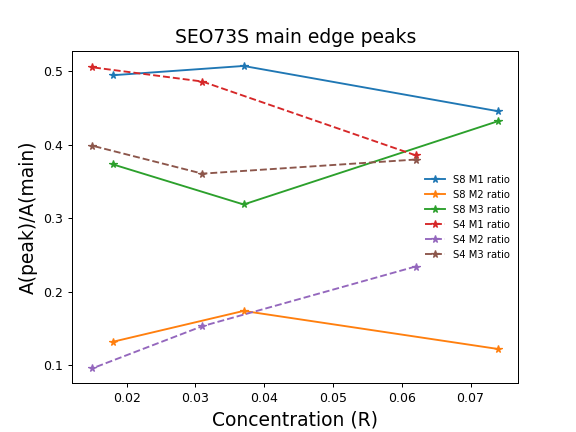

In [56]:
# M3 vs concentration
fig = plt.figure()
#ax2 = plt.twinx()

a=peak_area_BT1['g2_area'][12:15]
b=peak_area_BT1['g3_area'][12:15]
c=peak_area_BT1['g4_area'][12:15]

plt.plot(SEO73S_con[:3],a/(a+b+c),'-*', label='S8 M1 ratio')#, color='b')
plt.plot(SEO73S_con[:3],b/(a+b+c),'-*', label='S8 M2 ratio')
plt.plot(SEO73S_con[:3],c/(a+b+c),'-*', label='S8 M3 ratio')

d=peak_area_BT1['g2_area'][15:18]
e=peak_area_BT1['g3_area'][15:18]
f=peak_area_BT1['g4_area'][15:18]

plt.plot(SEO73S_con[3:],d/(d+e+f),'--*', label='S4 M1 ratio')#, color='b')
plt.plot(SEO73S_con[3:],e/(d+e+f),'--*', label='S4 M2 ratio')
plt.plot(SEO73S_con[3:],f/(d+e+f),'--*', label='S4 M3 ratio')

plt.legend(frameon=False, fontsize=8)
#ax2.legend(frameon=False, loc='center right')

plt.xlabel('Concentration (R)', fontsize=15)
#plt.set_ylabel('Peak area')
plt.title('SEO73S main edge peaks', fontsize=15)
plt.ylabel('A(peak)/A(main)',fontsize=15)#, color='r')
#ax2.tick_params(axis="y", labelcolor='r')
plt.savefig('SEO73S main edge peaks ratio', bbox_inches='tight')

### PEO

<IPython.core.display.Javascript object>


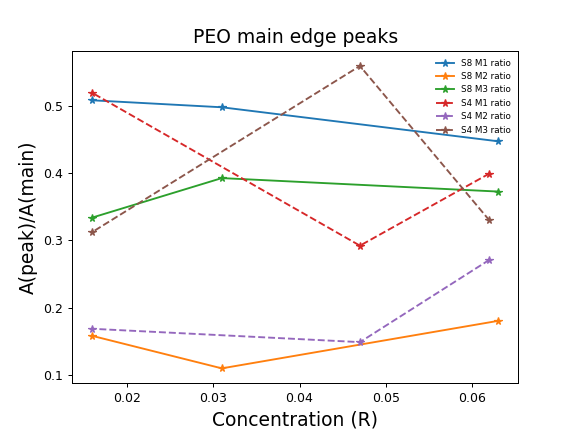

In [57]:
# M3 vs concentration
fig, ax1 = plt.subplots()
a=peak_area_BT1['g2_area'][18:21]
b=peak_area_BT1['g3_area'][18:21]
c=peak_area_BT1['g4_area'][18:21]

ax1.plot(PEO_con[:3],a/(a+b+c),'-*', label='S8 M1 ratio')#, color='b')
ax1.plot(PEO_con[:3],b/(a+b+c),'-*', label='S8 M2 ratio')
ax1.plot(PEO_con[:3],c/(a+b+c),'-*', label='S8 M3 ratio')

d=peak_area_BT1['g2_area'][21:]
e=peak_area_BT1['g3_area'][21:]
f=peak_area_BT1['g4_area'][21:]

ax1.plot(PEO_con[3:],d/(d+e+f),'--*', label='S4 M1 ratio')#, color='b')
ax1.plot(PEO_con[3:],e/(d+e+f),'--*', label='S4 M2 ratio')
ax1.plot(PEO_con[3:],f/(d+e+f),'--*', label='S4 M3 ratio')
ax1.legend(frameon=False, fontsize=7)

ax1.set_xlabel('Concentration (R)', fontsize=15)
ax1.set_title('PEO main edge peaks', fontsize=15)
ax1.set_ylabel('A(peak)/A(main)', fontsize=15)#, color='r')
#ax2.tick_params(axis="y", labelcolor='r')
plt.savefig('PEO main edge peaks ratio', bbox_inches='tight')

### A(main)/A(pre)

<IPython.core.display.Javascript object>


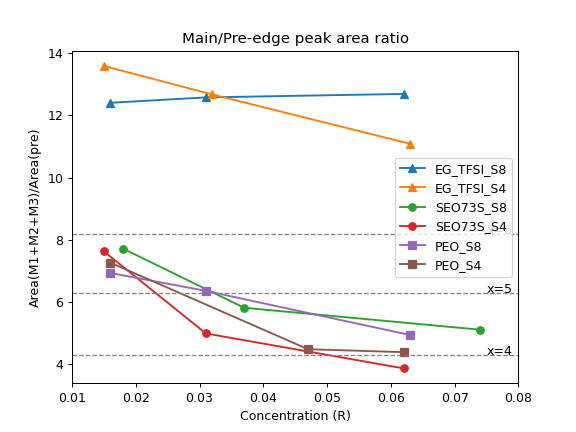

In [69]:
fig = plt.figure()
Sx=[4,5,6,7,8]
ratio=[4.3,6.3,8.2]

#plt.plot(PSTFSI_con[:3],peak_area_BT1['mp_ratio'][:3],'-^', label='PSTFSI_S8')
#plt.plot(PSTFSI_con[3:],peak_area_BT1['mp_ratio'][3:6],'-^', label='PSTFSI_S4')

plt.plot(EG_TFSI_con[:3],peak_area_BT1['mp_ratio'][6:9],'-^', label='EG_TFSI_S8')
plt.plot(EG_TFSI_con[3:],peak_area_BT1['mp_ratio'][9:12],'-^', label='EG_TFSI_S4')

plt.plot(SEO73S_con[:3],peak_area_BT1['mp_ratio'][12:15],'-o', label='SEO73S_S8')
plt.plot(SEO73S_con[3:],peak_area_BT1['mp_ratio'][15:18],'-o', label='SEO73S_S4')

plt.plot(PEO_con[:3],peak_area_BT1['mp_ratio'][18:21],'-s', label='PEO_S8')
plt.plot(PEO_con[3:],peak_area_BT1['mp_ratio'][21:],'-s', label='PEO_S4')

x=4
for i in ratio:
    plt.plot([0.01,0.08],[i,i], '--', color='gray', linewidth=1)
    plt.text(0.075,i,'x=%i'%x)
    x+=1

plt.title('Main/Pre-edge peak area ratio')#, fontsize=15)
plt.xlabel('Concentration (R)')#, fontsize=15)
plt.xlim(0.01,0.08)
plt.ylabel('Area(M1+M2+M3)/Area(pre)')#, fontsize=15)
plt.legend()#loc='upper left')

plt.savefig('Peak area ratio', bbox_inches='tight')

# Loading the normalized reference

In [42]:
file_ref = 'C:/Users/oppcexpv/Downloads/jz500260s_si_0022.txt'

Li2Sx = pd.read_csv(file_ref, delimiter='\t', skiprows=4, engine='python')
x = Li2Sx['#Energy [eV]']
ref = Li2Sx.columns[1:]
shift = 2471.0-2469.53831 #E(3e_pre)-E(Li2S4_pre)

for i in ref:
    np.savetxt(i+'_shift',np.c_[(x-shift)/1000, Li2Sx[i]])

In [22]:
Li2Sx.head(5)

,#Energy [eV],li2s2,li2s3,li2s4,li2s5,li2s6,li2s7,li2s8
0,2468.0060,1.140000e-11,4.660000e-27,6.540000e-09,8.040000e-07,0.000048,0.000026,9.820000e-16
1,2468.0445,2.190000e-11,3.010000e-26,1.140000e-08,1.310000e-06,0.000068,0.000037,2.620000e-15
2,2468.0830,4.150000e-11,1.890000e-25,1.960000e-08,2.110000e-06,0.000097,0.000051,6.880000e-15
3,2468.1215,7.820000e-11,1.150000e-24,3.360000e-08,3.380000e-06,0.000136,0.000071,1.780000e-14
4,2468.1600,1.460000e-10,6.810000e-24,5.700000e-08,5.380000e-06,0.000191,0.000097,4.560000e-14


<IPython.core.display.Javascript object>


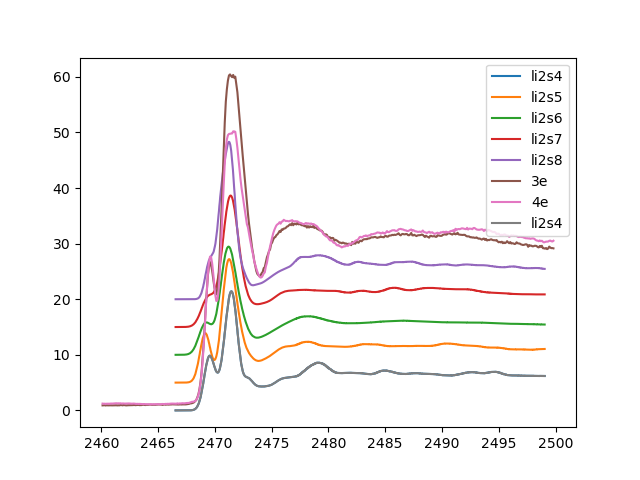

In [24]:
fig=plt.figure()

#shift = 2471.0-2469.53831
#nor = SEO_pre_height[4]/pre_edge_height[1]

offset=0
for i in ref[2:]:
    plt.plot(x-shift, Li2Sx[i]+offset, label=i)
    offset += 5
plt.plot(measurment_XAS.x*1000, XAS['3e'], label='3e')
plt.plot(measurment_XAS.x*1000, XAS['4e'], label='4e')
#plt.plot(measurment_XAS.x*1000, XAS['6a'], label='S')
#plt.plot(measurment_XAS.x*1000, XAS['6b'], label='Li2S')
plt.plot(x-shift, Li2Sx['li2s4'], label='li2s4')

#plt.plot(x-1.51, Li2Sx['li2s8']+offset, label='li2s8')
#plt.plot(measurment_XAS.x*1000, XAS['4a']*0.5, label='4a')
#plt.plot([2470,2470],[0,2], '--', color='gray', linewidth=1)
#plt.plot([2471.5,2471.5],[0,2], '--', color='gray', linewidth=1)

#plt.xlim(2468,2485)
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Reference", bbox_inches='tight')

### Li2Sx

In [25]:
pre_edge_center = [2471.5, 2471.0, 2470.6, 2470.5, 2470.8, 2471.0] #from the paper
#a = 1.51
#[2469.89216+a,2469.45385+a,2469.07503+a,2469.03804+a,2469.24907+a,2469.46263+a] #from larch
center_row = []

for i in pre_edge_center:
    for row in range(0,len(x)):  # Find the row number
        if abs(x.loc[row]-i)<0.022: # If the row value is close enough
            print(x.loc[row],row)
            center_row.append(row) #Lower boundary
        else:
            continue

pre_edge_height = []
for i in range(len(center_row)):
    pre_edge_height.append(Li2Sx[Li2Sx.columns[i+2]].loc[center_row[i]])
pre_edge_height

ref_height_ratio = Li2Sx.max()[2:]/pre_edge_height
ref_height_ratio

2471.515 91
2471.009 78
2470.591 67
2470.514 65
2470.822 73
2471.009 78


li2s3    1.557639
li2s4    2.174802
li2s5    2.501329
li2s6    3.507405
li2s7    4.285507
li2s8    3.863602
dtype: float64

# XES peak area ratio vs Main

<IPython.core.display.Javascript object>


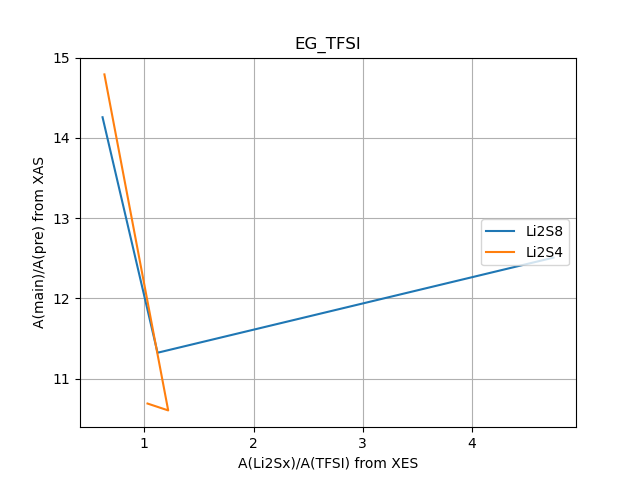

In [17]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twiny()

PSTFSI_XES_ratio =[0.516380741174271,0.7263962083192295,0.26593879400398335,
                    0.26609289340486497,0.2119518139411188,0.1908387175268192]

EG_TFSI_XES_ratio = [4.745419277642507,1.1208567427451468,0.6172956680589499,
                    1.0289232311556669,1.218313751236794,0.6344176833443902]
#EG_TFSI_DF['XAS_ratio']
ax1.plot( EG_TFSI_DF['XES_ratio'][:3], EG_TFSI_DF['XAS_ratio'][:3], label='Li2S8')
ax1.plot( EG_TFSI_DF['XES_ratio'][3:], EG_TFSI_DF['XAS_ratio'][3:], label='Li2S4')

#ax2.plot(ref_height_ratio, S_x, label='reference', color='r')

ax1.set_title('EG_TFSI')
ax1.set_xlabel('A(Li2Sx)/A(TFSI) from XES')
ax1.set_ylabel('A(main)/A(pre) from XAS')
ax1.legend(loc='center right')
ax1.grid()

'''
ax2.set_ylabel('x in Li2Sx', color='r')
ax2.tick_params(axis="y", labelcolor='r')
ax2.legend(loc='lower right')
'''
plt.savefig('EG_TFSI XES_ratio vs XAS_ratio', bbox_inches='tight')

In [15]:
EG_TFSI_DF = pd.DataFrame({'conc':EG_TFSI_con, 
                           'XES_ratio':EG_TFSI_XES_ratio, 
                           'XAS_ratio':EG_TFSI_area_ratio})
PSTFSI_DF =  pd.DataFrame({'conc':PSTFSI_con, 
                           'XES_ratio':PSTFSI_XES_ratio})
PSTFSI_DF

,conc,XES_ratio
0,0.061,0.516381
1,0.029,0.726396
2,0.013,0.265939
3,0.039,0.266093
4,0.032,0.211952
5,0.015,0.190839
